In [1]:
import numpy as np
from math import pi
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

In [2]:
def Lorentzian(x, x0, gamma):
    return gamma/pi * 1/((x-x0)**2 + gamma**2)

def shifted_sum(x, x0, x1, gamma):
    return 0.5 * Lorentzian(x, x0, gamma) + 0.5 * Lorentzian(x, x1, gamma)

def scaled_sum(x, x0, gamma1, A1, gamma2, A2):
    return A1 * Lorentzian(x,x0, gamma1) + A2 * Lorentzian(x, x0, gamma2)

def shifted_chisq(theta, x, y,yerr):
    return 0.5*np.sum((y - shifted_sum(x,*theta))**2)

def scaled_chisq(theta,x,y,yerr):
    return 0.5*np.sum((y - scaled_sum(x,*theta))**2/yerr**2)

In [3]:
f0 = 450
BW = 2e-3
df = 0.05e-3
f = np.linspace(f0-BW/2, f0+BW/2, 10000)

In [7]:
# Now I want to make a dataset out of an average of shifted Lorentzians
gamma = 0.1e-3
psd1 = Lorentzian(f, f0, gamma)
psd2 = Lorentzian(f, f0+df,gamma)
psd = (psd1 + psd2)/2

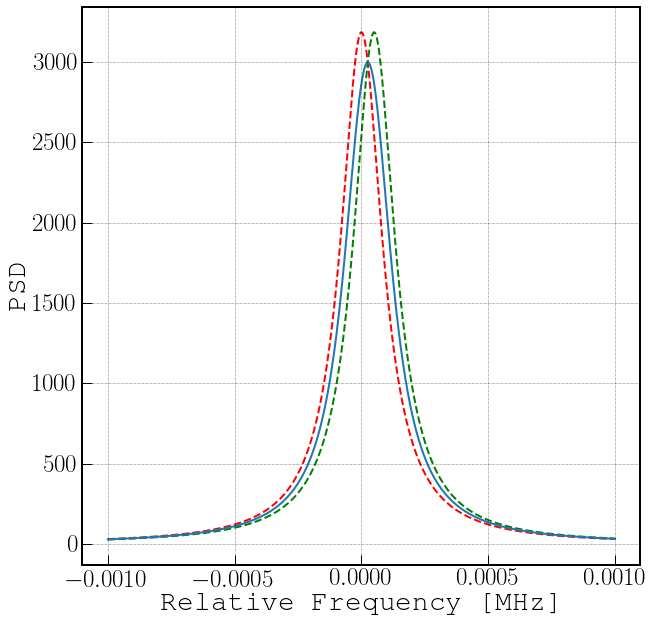

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((f-f0), psd1, 'r--', label='One')
ax.plot((f-f0), psd2, 'g--',label='Two')
ax.plot((f-f0), psd, label='Combined')
ax.grid(which='both')
ax.set_xlabel('Relative Frequency [MHz]')
ax.set_ylabel('PSD');

In [38]:
sigma = 20
psderr = sigma * np.random.randn(psd.size)
psd_full = psd + psderr

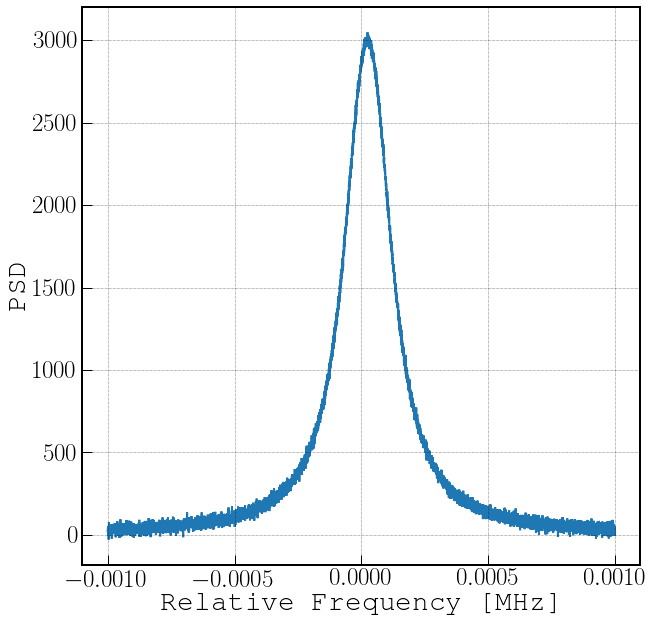

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((f-f0), psd_full, label='Combined')
ax.grid(which='both')
ax.set_xlabel('Relative Frequency [MHz]')
ax.set_ylabel('PSD');

In [40]:
p0 = [f0, gamma, 0.5, gamma*0.5, 0.5]
result = opt.minimize(scaled_chisq, p0, args=(f, psd_full, psderr) )

In [41]:
chisquared = scaled_chisq(result['x'], f, psd_full, psderr)
ndofs = psd_full.size - 5
print (chisquared/ndofs)

28275.708613169438


In [42]:
# f_fit, gamma1, A1, gamma2, A2 = result['x']
psd_fit = scaled_sum(f, *result['x'])

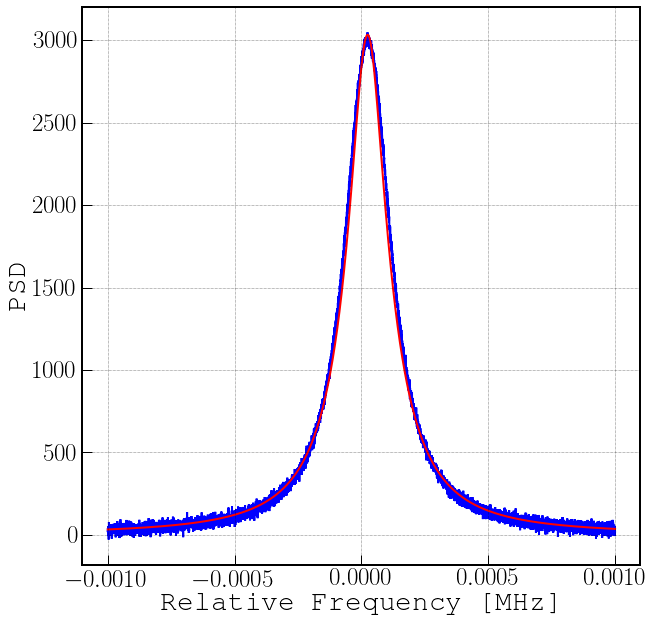

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((f-f0), psd_full,'b', label='Data')
ax.plot((f-f0), psd_fit,'r', label='Fit')
ax.grid(which='both')
ax.set_xlabel('Relative Frequency [MHz]')
ax.set_ylabel('PSD');

In [44]:
residuals = psd_fit - psd_full

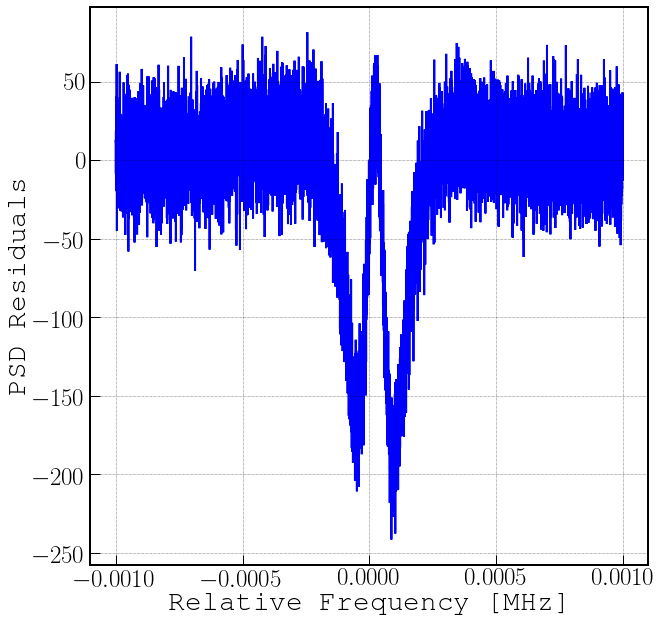

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((f-f0), residuals,'b', label='Data')
ax.grid(which='both')
ax.set_xlabel('Relative Frequency [MHz]')
ax.set_ylabel('PSD Residuals');

In [46]:
f_fit, gamma1_fit, A1_fit, gamma2_fit, A2_fit = result['x']
print (f_fit)
print (gamma1_fit*1e3)
print (A1_fit)
print (gamma2_fit*1e3)
print (A2_fit)

450.000024318699
0.07939179761091805
0.47650788157904583
0.14476702942053582
0.5102988902478074


In [47]:
print (f0)
print (gamma*1e3)
print (df*1e3)

450
0.1
0.05


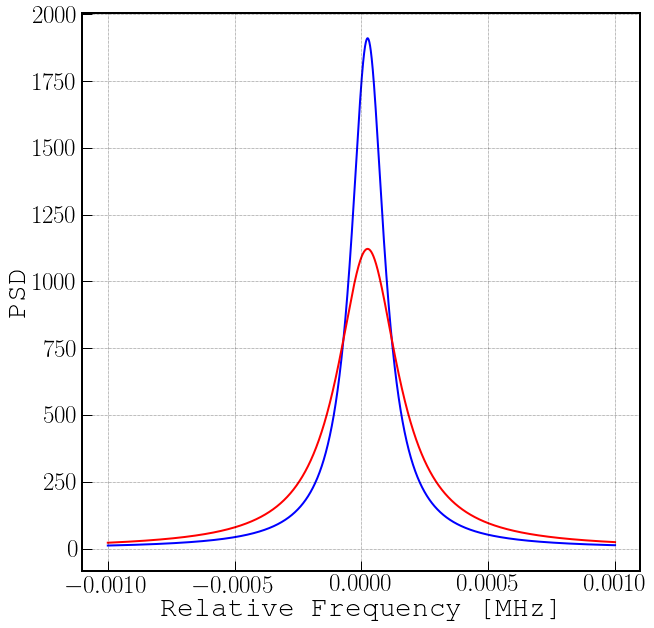

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((f-f0), A1_fit*Lorentzian(f,f_fit,gamma1_fit),'b', label='Data')
ax.plot((f-f0), A2_fit*Lorentzian(f,f_fit,gamma2_fit),'r', label='Fit')
ax.grid(which='both')
ax.set_xlabel('Relative Frequency [MHz]')
ax.set_ylabel('PSD');

Try to broaden the Lorentzian using a random wander of the resonance frequency due to say temp drifts

In [4]:
f0 = 450
Nchirps = 15000
N = 5000
BW = 2e-3
df = 0.05e-3
f = np.linspace(f0-BW/2, f0+BW/2, N*Nchirps).reshape((-1, N))
sigma = 5e-3
gamma = 0.1e-3
gaussian = np.random.randn(Nchirps)*sigma

In [5]:
fr = f0 + gaussian
fr = fr[:, np.newaxis]
dataset = Lorentzian(f, fr, gamma)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f[::100], (f-fr)[::100])
ax.grid(which='both')
ax.set_xlabel('Relative Frequency [MHz]')
ax.set_ylabel('PSD');

In [8]:
fr[:,0]

array([450.00933123, 449.99545494, 449.99896558, ..., 449.99269749,
       450.00400779, 449.99922837])

IndexError: index 1 is out of bounds for axis 1 with size 1